# Jaleel Walter Henry Savoy
#### Assignment 4
#### Statistic 508 - Applied Data Mining & Statistical Learning, Summer 2019

# Introduction
&ensp; The objective of this study is to predict crime per capita crime rate using the Boston dataset which is built into the `MASS` library in R using three methods (Best Subset Selection, Ridge Regression, and LASSO regression). The data set will be split into a training and validation set, with 75% of the data for training and the remainder for validation. As part of this report, there will be exploratory data analysis conducted to better understand the data and determine any peculiar features of the data. After exploring the data, there will be comparisons of the best subset selection, the linear regression with L2 regularization (Ridge Regression), and the linear regression with L1 regularization (LASSO regression). Once a set of candidate models has been identified and fitted they will be evaluated based on predictive performance on the validation data set; a subset of the candidate models (at least 1) will be selected as the proposed solutions to the research problem. 

&ensp; The code associated with this report is available in the Appendix.

## Data
&ensp; The Boston data set was extracted from 1970 census and contains housing data for Boston census tracts. The Boston data set is relatively small; there are 506 observations, each corresponding to an individual census tract, and 14 variables in the data set. The data was initially published by Harrison and Rubinfeld for the paper *'Hedonic prices and the demand for clean air'* in 1978.


| Variable Name | Description | Data Type |
| --- | --- | --- |
| crim | per capita crime (by town) | numeric |
| zn | proportion of residential land zoned for lots over 25k sqft | numeric |
| indus | proportion of non-retail business acres per town | numeric |
| chas | Charles River dummy variable (1 if river is present, 0 otherwise) | integer (binary) |
| nox | nitric oxides concentration (parts per 10 million) | numeric |
| rm | average number of rooms per dwelling | numeric |
| age | proportion of owner-occupied units built prior to 1940 | numeric |
| dis | weighted distances to five Boston employment centers | numeric |
| rad | index of accessibility to radial highways | integer |
| tax | full-value property-tax rate per 10,000 USD | numeric |
| ptratio | pupil-teacher ratio by town | numeric |
| black | derived feature based on proportion of Black people by town | numeric |
| lstat | percentage of lower status of the population | numeric |
| medv | median value of owner-occupied homes in USD (1000s) | numeric |


# Exploratory Data Analysis

&ensp;  The data set was preprocessed and cleaned by the publisher of the data; there were no missing data points or data formatting errors. There are some peculiarities that were discovered during the data exploration process.

## Correlation Among Predictor Features
&ensp; There is some linear correlation among the predictor features. The Pearson correlation coefficient matrix (available in the Appendix) shows the strength and direction of the linear relationship between variables. By assessing the values of this matrix it is clear that the strongest linear correlation between predictor features is observed with the full-value property-tax rate per 10,000 USD (`tax`) and the index of accessibility to radial highways (`rad`) feature. There are some other decent strength linearly correlated predictor feature pairs in the data set.
* The percentage of lower status of the population (`lstat`) feature is negatively linearly associated with the median value of owner-occupied homes in thousands of USD (`medv`) feature with a Pearson correlation coefficient of -0.74

* The full-value property-tax rate per 10,000 USD (`tax`) feature is positively linearly associated with the proportion of non-retail business acres per town (`indus`) feature with a Pearson correlation coefficient of 0.72

* The full-value property-tax rate per 10,000 USD (`tax`) feature is positively linearly associated with the index of accessibility to radial highways (`rad`) feature with a Pearson correlation coefficient of 0.91

* The weighted distances to five Boston employment centers (`dis`) feature is negatively linearly associated with the proportion of non-retail business acres per town (`indus`) feature with a Pearson correlation coefficient of -0.71

* The weighted distances to five Boston employment centers (`dis`) feature is negatively linearly associated with the nitric oxides concentration (parts per 10 million) (`nox`) feature with a Pearson correlation coefficient of -0.77

* The weighted distances to five Boston employment centers (`dis`) feature is negatively linearly associated with the proportion of owner-occupied units built prior to 1940 (`age`) feature with a Pearson correlation coefficient of -0.75

* The proportion of owner-occupied units built prior to 1940 (`age`) feature is positively linearly associated with the nitric oxides concentration (parts per 10 million) (`nox`) feature with a Pearson correlation coefficient of 0.73

* The proportion of non-retail business acres per town (`indus`) feature is positively linearly associated with na with a Pearson correlation coefficient of 0.76

## Variance Inflation Factors and Multicollinearity
&ensp; In addition to linearly correlated predictor features, there exists some multicollinearity in the data set. Multicollinearity has a number of negative effects, but regressions that utilize shrinkage methods can deal with collinear features. Additionally, centering the data is sometimes performed to address multicollinearity. There are two moderately multicollinear features and one highly multicollinear feature. The variance inflation factors are available in the Appendix.
* The weighted distances to five Boston employment centers (`dis`) feature has a VIF value of 4.29
* The nitric oxides concentration (parts per 10 million) (`nox`) feature has a VIF value of 4.55
* The full-value property-tax rate per 10,000 USD (`tax`) feature has a VIF value of 9.20

&ensp; The multicollinearity won't be directly addressed, but the regularization regressions used (Ridge regression and LASSO regression) work well in the presence of multicollinearity in the data set, despite the fact that Ridge regression does not actually perform variable selection. Additionally, the best subset selection process should choose an appropriate model with a variable subset selection that removes the highly multicollinear features from the model.

# Best Subset Selection, Ridge Regression, and LASSO Regression
&ensp; Three methods will be used for identifying candidate model. The best model(s) will be the one(s) that: are valid, achieve the best validation set performance, and are easiest to interpret. The last of the criteria, interpretability, is subjective, so other researchers may have differing opinions about models chosen based on that criterion.

&ensp; The numeric features of the data set were standardized prior to the fitting of the models.

## Best Subset Selection
&ensp; The Best Subset Selection method was implemented to select the three best possible models for every possible model size up to 10 variables. The best three models from each model size are saved so that there would be a robust selection of candidate models from this method. To get a better idea of which variable selections achieve the desired performance, visually assess the three graphic tables of best subsets order by Adjusted R-squared (**Fig. 1a**), Bayesian Information Criterion (**Fig. 1b**), and Mallows' Cp-statistic (**Fig. 1c**). Some insights mined from these visualizations: 
* The top four performing models (based on Adjusted R-squared values) all exclude `nox`, `dis`, `rad`, `black`, `medv`,`blackSquare`, `medvSquare`, `blackCube`, `medvCube`, and `medvPoly`
* A model with only the tax feature has an Adjusted R-squared value of about 0.33
* The majority of the best models (based on Adjusted R-squared values) include `nox`, `rad`, `black`, `medv`,`blackSquare`, `medvSquare`, `blackCube`, `medvCube`, and `medvPoly`
* The best model (based on Bayesian Information Criterion) includes `rad`, `medv`, `medvCube`, and `medvPoly`
* The best model (based on Mallows' Cp-statistic) includes `rad`, `black`, `medv`, `blackSquare`, `medvSquare`, `blackCube`, `medvCube`, and `medvPoly`

&ensp; To compare the models, a compact data frame that includes the model subset identifiers and their performance metrics (using the Adjusted R-squared, R-squared, Bayesian Information Criterion, and Mallow's Cp Statistic) was used and is available in the Appendix. Below, is the summarization table of the four candidate models chosen from this Best Subset Selection method; the models are ordered by Adjusted R-squaring (descending), Bayesian Information Criterion (ascending), and Mallow's Cp-statistic (ascending).

| Model ID | Adj-R2 | R2 | BIC | Cp | 
| --- | --- | --- | --- | --|
| 11(1) | 0.5300 | 0.5437 | -232.0396 | 5.5669 |
| 11(2) | 0.5300 | 0.5437 | -232.0343 | 5.5719 |
| 10(1) | 0.5230 | 0.5424 | -236.8827 | 4.6153|
| 10(2) | 0.5295 | 0.5419 | -236.6023 | 4.9747 |

**Variables included in Model 11(1)**: `nox`, `dis`, `rad`, `tax`, `ptratio`, `black`, `blackSquare`, `medvSquare`, `blackCube`, `medvCube`, `medvPoly` 

**Variables included in Model 11(2)**: `zn`, `nox`, `dis`, `rad`, `tax`, `black`, `blackSquare`, `medvSquare`, `blackCube`, `medvCube`, `medvPoly` 

**Variables included in Model 10(1)**: `nox`, `dis`, `rad`, `ptratio`, `black`, `blackSquare`, `medvSquare`, `blackCube`, `medvCube`, `medvPoly` 

**Variables included in Model 10(2)**: `nox`, `dis`, `rad`, `black`, `medv`, `blackSquare`, `medvSquare`, `blackCube`, `medvCube`, `medvPoly` 

**NOTE**: To adhere to the hierarchy principle, lower-order terms will be kept in the model if the best subset selection process included the higher-order terms in the models

&ensp; The summaries of these models are available in the Appendix. In **Fig. 2a-2d** it is evident that all of the models perform very similarly and their residual plots convey the same thing: there is some nonlinearity that is not being completely accounted for, which is causing the residuals to have a curvilinear relationship with the fitted values. Additionally, there are some extremely outlying residuals that are likely heavily influencing the estimated regression hyperplane.

&ensp; Out of the narrowed set of candidate models, it is best to move forward with Model 10(1), because it is only about 0.007 away from the highest R-squared while also having the lowest BIC value and an appropriate Cp-statistic.

## Ridge Regression
&ensp; Before performing the Ridge regression, a grid of potential lambda values is defined; each of the lambda values was fitted and the results are used to find the value that results in the best model. The grid is comprised of 250 possible lambda values that range from $10^{15}$ to $10^{-5}$, which will account for models containing just the intercept to model's that contain the ordinary least-squares fit with no shrinkage. There are 250 estimated coefficients for each of the 18 predictors to correspond to the 250 possible lambda values in the grid. Next, a 5-fold Cross-Validation is performed, using a mean-squared error (MSE) loss measurement, in order to identify the lambda value that results in the best model performance on the loss metric. In **Fig. 3a**, it is apparent that the MSE vs the log(Lambda) and the log(lambda) value that results in the smallest cross-validation MSE is around -0.42. The cross-validation object is used to get the actual lambda value which is about 0.384. 

Here are the estimated coefficients for that model:

 Variable | Coefficient 
 --- | --- 
 (Intercept) | -0.175230953
 zn | 0.017861330
 indus | -0.013094955
 chas | -0.011714429
 nox | 0.003421086
 rm | -0.004833747
 age | 0.011005219
 dis |-0.046300242
 rad|0.198165383
 tax|0.093745458
 ptratio|0.004842132
 black   |    -0.008241769
 lstat    |    0.033408605
 medv      |  -0.005072271
 blackSquare | 0.017621043
 medvSquare  | 0.126575939
 blackCube  | -0.004148447
 medvCube   | -0.192546984
 medvPoly   |  0.052815520



## LASSO Regression
&ensp; The same grid of lambda values defined earlier and it will again be used to search for the lambda that results in the model with the smallest MSE metric using 5-fold cross-validation. The difference between the two approaches is that the L1 regularization used with LASSO regression allows for coefficients to be zeroed, while the L2 regularization used with Ridge regression did not zero any coefficients. In **Fig. 3b**, it is apparent that the MSE vs the log(Lambda) and the log(lambda) value that results in the smallest cross-validation MSE is around -4.33. The cross-validation object is used to get the actual lambda value which is about 0.0132.

Here are the estimated coefficients for that model:

 Variable | Coefficient 
 --- | --- 
(Intercept) | -0.230835006
zn         |  0.024567953
indus       | 0.003810779
chas     |   -0.009213345
nox      |   -0.105162053
rm        |  -0.033720033
age        |  0.018871851
dis |         -0.097773691
rad |         0.464943447
tax  |       -0.061866583
ptratio |    -0.052099102
black    |    0          
lstat     |  -0.015114681
medv       |  0          
blackSquare | 0.045872257
medvSquare  | 0.237325519
blackCube   | 0.008407419
medvCube   | -0.233209259
medvPoly   |  0.052139344

# Conclusions

## Comparing Candidate Models From Each Method
&ensp; The three remaining candidate models, which represent the best model from each method, will be assessed on their predictive capabilities on the validation set and the metric to assess performance is MSE. The results are visualized in **Fig. 4a - Fig. 4c**, which contain plots with the predictions represented as scatter points and the actual, observed values represented as a line; visually it is clear that all three models perform fairly similarly. In order of best MSE performance on the validation set: LASSO regression candidate model (MSE=0.50141), OLS candidate model (MSE=0.52335), Ridge regression candidate model (MSE=0.54048).

## Proposed Model
&ensp; Based on the results of the comparison, the final proposed model is the LASSO regression. Despite the fact that this model performs best out of the candidate models considered among the three methods, there is much to be desired. There still appears to be a considerable amount of variation left unexplained by the model. Perhaps there are some feature transformations or feature engineering tasks that would result in better models.

# Citations
Andreas Alfons (2016). robustHD: Robust Methods for High-Dimensional
  Data. R package version 0.5.1.
  https://CRAN.R-project.org/package=robustHD
  
Gareth James, Daniela Witten, Trevor Hastie and Rob Tibshirani
  (2017). ISLR: Data for an Introduction to Statistical Learning with
  Applications in R. R package version 1.2.
  https://CRAN.R-project.org/package=ISLR
  
Hadley Wickham. Reshaping data with the reshape package. Journal of
  Statistical Software, 21(12), 2007.

Hadley Wickham (2017). tidyverse: Easily Install and Load the
  'Tidyverse'. R package version 1.2.1.
  https://CRAN.R-project.org/package=tidyverse
  
Jerome Friedman, Trevor Hastie, Robert Tibshirani (2010).
  Regularization Paths for Generalized Linear Models via Coordinate
  Descent. Journal of Statistical Software, 33(1), 1-22. URL
  http://www.jstatsoft.org/v33/i01/.
  
John Fox and Sanford Weisberg (2011). An {R} Companion to Applied
  Regression, Second Edition. Thousand Oaks CA: Sage. URL:
  http://socserv.socsci.mcmaster.ca/jfox/Books/Companion

Revelle, W. (2018) psych: Procedures for Personality and
  Psychological Research, Northwestern University, Evanston, Illinois,
  USA, https://CRAN.R-project.org/package=psych Version = 1.8.12.
  
Taiyun Wei and Viliam Simko (2017). R package "corrplot":
  Visualization of a Correlation Matrix (Version 0.84). Available from
  https://github.com/taiyun/corrplot
 
Thomas Lumley based on Fortran code by Alan Miller (2017). leaps:
  Regression Subset Selection. R package version 3.0.
  https://CRAN.R-project.org/package=leaps

Venables, W. N. & Ripley, B. D. (2002) Modern Applied Statistics with
  S. Fourth Edition. Springer, New York. ISBN 0-387-95457-0

# Appendix

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

integer(0)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.00000000,-0.20046922,0.40658341,-0.055891582,0.42097171,-0.21924670,0.35273425,-0.37967009,0.625505145,0.58276431,0.2899456,-0.38506394,0.4556215,-0.3883046
zn,-0.20046922,1.00000000,-0.53382819,-0.042696719,-0.51660371,0.31199059,-0.56953734,0.66440822,-0.311947826,-0.31456332,-0.3916785,0.17552032,-0.4129946,0.3604453
indus,0.40658341,-0.53382819,1.00000000,0.062938027,0.76365145,-0.39167585,0.64477851,-0.70802699,0.595129275,0.72076018,0.3832476,-0.35697654,0.6037997,-0.4837252
chas,-0.05589158,-0.04269672,0.06293803,1.000000000,0.09120281,0.09125123,0.08651777,-0.09917578,-0.007368241,-0.03558652,-0.1215152,0.04878848,-0.0539293,0.1752602
nox,0.42097171,-0.51660371,0.76365145,0.091202807,1.00000000,-0.30218819,0.73147010,-0.76923011,0.611440563,0.66802320,0.1889327,-0.38005064,0.5908789,-0.4273208
rm,-0.21924670,0.31199059,-0.39167585,0.091251225,-0.30218819,1.00000000,-0.24026493,0.20524621,-0.209846668,-0.29204783,-0.3555015,0.12806864,-0.6138083,0.6953599
age,0.35273425,-0.56953734,0.64477851,0.086517774,0.73147010,-0.24026493,1.00000000,-0.74788054,0.456022452,0.50645559,0.2615150,-0.27353398,0.6023385,-0.3769546
dis,-0.37967009,0.66440822,-0.70802699,-0.099175780,-0.76923011,0.20524621,-0.74788054,1.00000000,-0.494587930,-0.53443158,-0.2324705,0.29151167,-0.4969958,0.2499287
rad,0.62550515,-0.31194783,0.59512927,-0.007368241,0.61144056,-0.20984667,0.45602245,-0.49458793,1.000000000,0.91022819,0.4647412,-0.44441282,0.4886763,-0.3816262
tax,0.58276431,-0.31456332,0.72076018,-0.035586518,0.66802320,-0.29204783,0.50645559,-0.53443158,0.910228189,1.00000000,0.4608530,-0.44180801,0.5439934,-0.4685359



Call:
glm(formula = crim ~ ., data = Boston)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-9.924  -2.120  -0.353   1.019  75.051  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  17.033228   7.234903   2.354 0.018949 *  
zn            0.044855   0.018734   2.394 0.017025 *  
indus        -0.063855   0.083407  -0.766 0.444294    
chas         -0.749134   1.180147  -0.635 0.525867    
nox         -10.313535   5.275536  -1.955 0.051152 .  
rm            0.430131   0.612830   0.702 0.483089    
age           0.001452   0.017925   0.081 0.935488    
dis          -0.987176   0.281817  -3.503 0.000502 ***
rad           0.588209   0.088049   6.680 6.46e-11 ***
tax          -0.003780   0.005156  -0.733 0.463793    
ptratio      -0.271081   0.186450  -1.454 0.146611    
black        -0.007538   0.003673  -2.052 0.040702 *  
lstat         0.126211   0.075725   1.667 0.096208 .  
medv         -0.198887   0.060516  -3.287 0.001087 ** 
---
Signif

zn    indus     chas      nox       rm      age      dis      rad 
2.325094 3.987753 1.094326 4.551563 2.258113 3.100801 4.289041 7.158834 
     tax  ptratio    black    lstat     medv 
9.195495 1.984489 1.369741 3.561476 3.772856

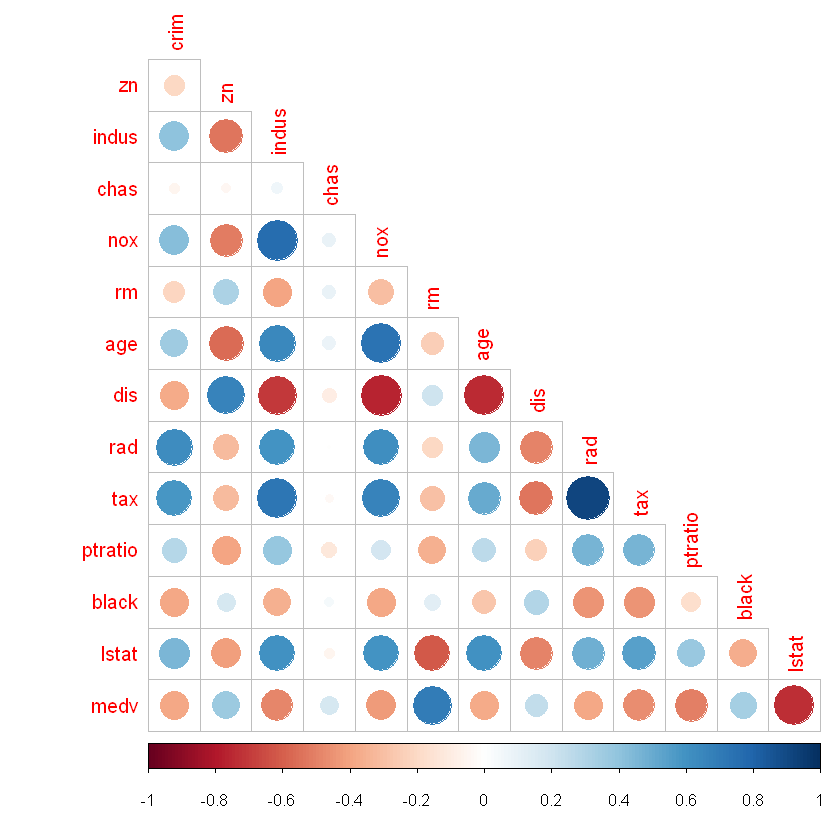

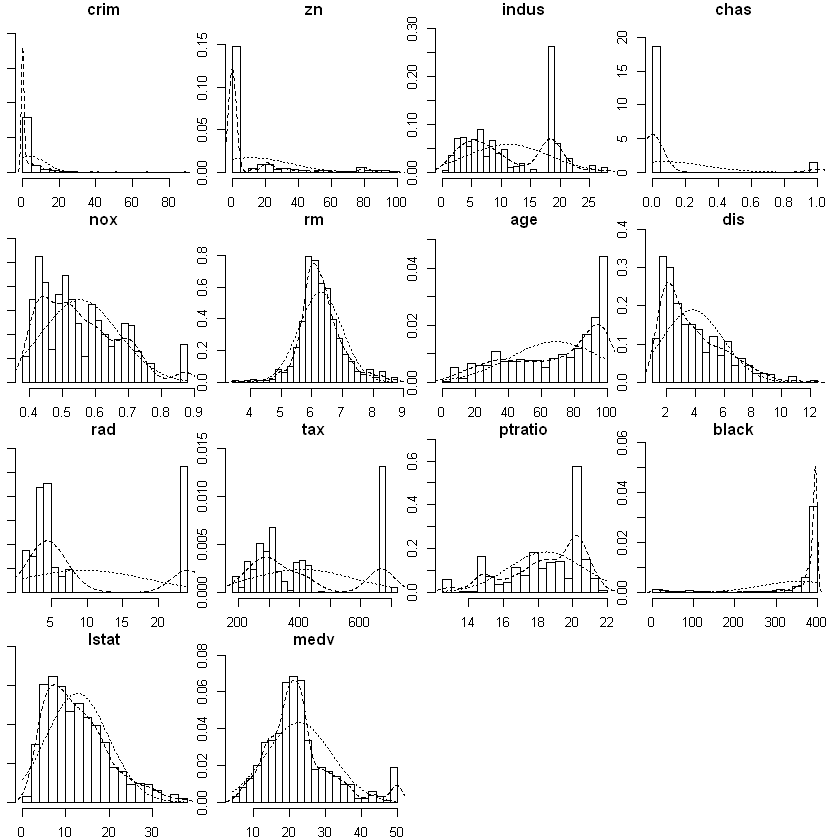

In [469]:
################################################################################################
# Appendex: Exploratory Data Analysis
################################################################################################
# Load the relevant packages
# install.packages("robustHD", repo="https://cran.r-project.org")
suppressPackageStartupMessages(library(MASS, warn.conflicts=FALSE))
suppressPackageStartupMessages(library(ISLR, warn.conflicts=FALSE))
suppressPackageStartupMessages(library(glmnet, warn.conflicts=FALSE))
suppressPackageStartupMessages(library(corrplot, warn.conflicts=FALSE))
suppressPackageStartupMessages(library(tidyverse, warn.conflicts=FALSE))
suppressPackageStartupMessages(library(car, warn.conflicts=FALSE))
suppressPackageStartupMessages(library(psych, warn.conflicts=FALSE))
suppressPackageStartupMessages(library(robustHD, warn.conflicts=FALSE))
suppressPackageStartupMessages(library(reshape, warn.conflicts=FALSE))
suppressPackageStartupMessages(library(leaps, warn.conflicts=FALSE))

# Preview the Data set
head(Boston)
(summary(Boston))
print(which(is.na(Boston)))

# Plot correlation matrices and correlation plots
corrplot(cor(Boston), method = "circle", type = "lower", diag = FALSE)
(cor(Boston))
modelLR<-glm(crim ~ ., data=Boston)
(summary(modelLR))
(car::vif(modelLR))

# histogram of the features in the data set
psych::multi.hist(Boston[,sapply(Boston, is.numeric)])

In [470]:
################################################################################################
# Appendex: Standardize the Features and Split the Data set
################################################################################################
# Set Seed for reproducibility
set.seed(123)

# standardize the features in the data set
# Preview the Data set
data(Boston)
data <- Boston
data[,sapply(data, is.numeric)] <- standardize(
    data[,sapply(data, is.numeric)], centerFun=mean, scaleFun=sd)

# Adding Higher-order terms for some features
data$blackSquare <- data$black**2
data$medvSquare <- data$medv**2
data$blackCube <- data$black**3
data$medvCube <- data$medv**3
data$medvPoly <- data$medv**4

# Split data in training and test sets (75-25 split)
training <- sample(seq_len(nrow(data)), size = floor(0.75 * nrow(data)))
test <- data[-training, ]
data <- data[training, ]

[1] "Best Models Ranked in Order of Adj R-Sq, BIC, and Cp-Statistic"

model.id,adjr2,r2,bic,cp
11 ( 1 ),0.530044783999409,0.543684645149822,-232.039564121152,5.56688829416026
11 ( 2 ),0.530038291191587,0.543678340787609,-232.03432796868,5.57189744619882
10 ( 1 ),0.529963097071712,0.542365126172722,-236.882734300381,4.61531650172964
12 ( 1 ),0.529788103788096,0.54467607939375,-226.926375301494,6.77914090641883
11 ( 3 ),0.529689123274638,0.543339307031839,-231.752846516084,5.84127784847959
10 ( 2 ),0.529498522525126,0.54191280952974,-236.508323705036,4.97470620016185
12 ( 2 ),0.529385802477248,0.544286515855277,-226.60225120009,7.08866991620494
10 ( 3 ),0.529352260824736,0.541770406977118,-236.390524775996,5.08785262366183
12 ( 3 ),0.529177442824304,0.54408475334174,-226.434489936551,7.24898099478276
9 ( 1 ),0.528932823314831,0.540119115109466,-240.964738575474,4.39989208881809


,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,blackSquare,medvSquare,blackCube,medvCube,medvPoly
1 ( 1 ),,,,,,,,*,,,,,,,,,,
1 ( 2 ),,,,,,,,,*,,,,,,,,,
1 ( 3 ),,,,,,,,,,,,*,,,,,,
2 ( 1 ),,,,,,,,*,,,,*,,,,,,
2 ( 2 ),,,,,,,,*,,,,,*,,,,,
2 ( 3 ),,,,,,,,*,,,*,,,,,,,
3 ( 1 ),,,,,,,,*,,,,,,,,,*,*
3 ( 2 ),,,,,,,,*,,,,,,,*,,*,
3 ( 3 ),,,,,,,,,*,,,,,,,,*,*
4 ( 1 ),,,,,,,,*,,,,,*,,,,*,*


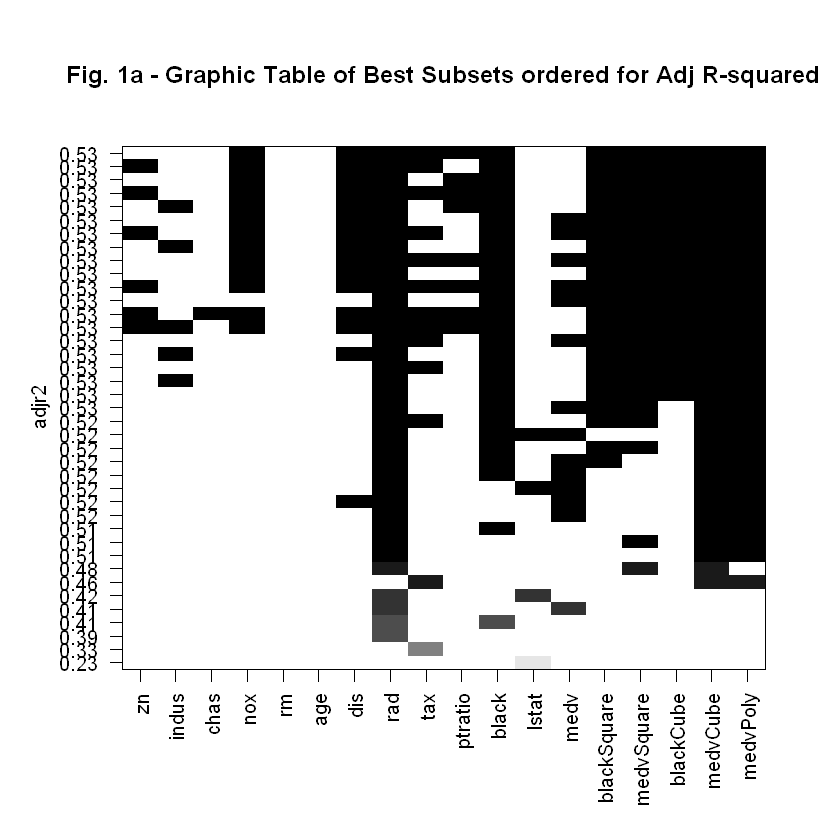

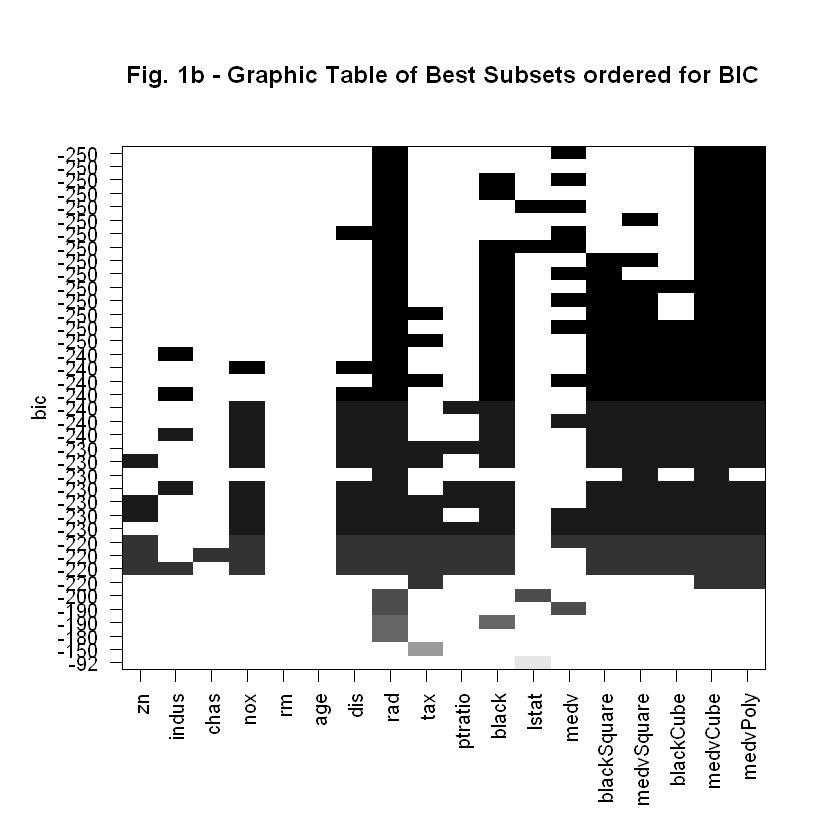

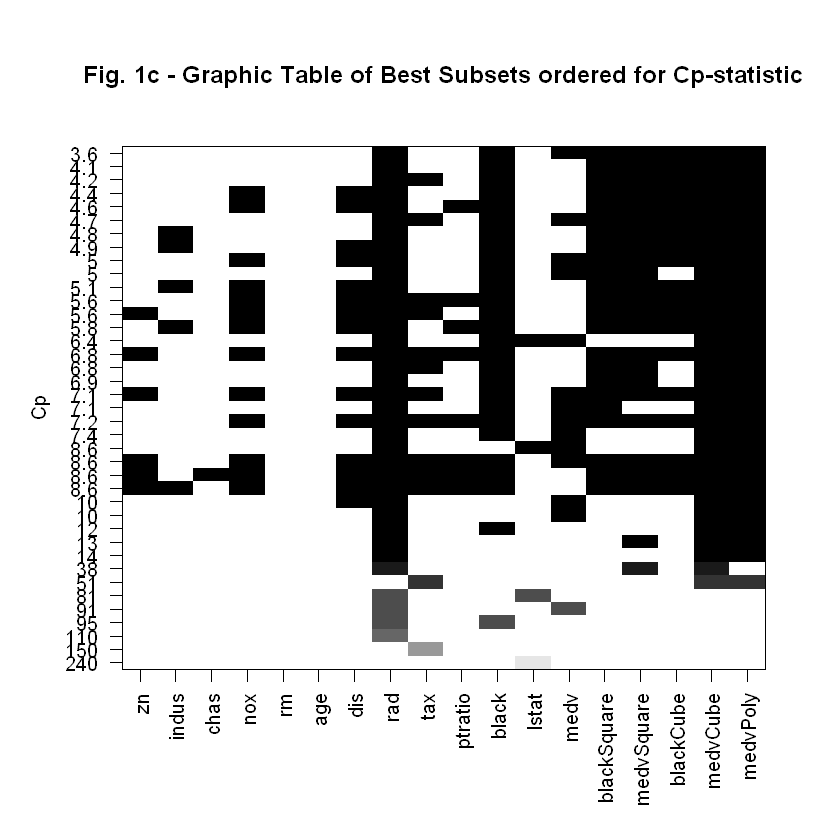

In [471]:
################################################################################################
# Appendex: Perform Best Subset Selection
################################################################################################
# Set Seed for reproducibility
set.seed(123)

# Perform Best Subset Regression
fullReg <- regsubsets(crim ~., data=data, nbest=3, nvmax=13, intercept=FALSE)
regSubSummary <- (summary(fullReg))

regSubSummaryDF <- data.frame(cbind("model id"=rownames(regSubSummary$outmat),
                         "adjr2"=regSubSummary$adjr2,
                         "r2"=regSubSummary$rsq,
                         "bic"=regSubSummary$bic,
                         "cp"=regSubSummary$cp))
comment(regSubSummaryDF) <- "Best Models Ranked in Order of Adj R-Sq, BIC, and Cp-Statistic"

(comment(regSubSummaryDF))
head(arrange(regSubSummaryDF, desc(adjr2), (bic), (cp)), 10)
(regSubSummary$outmat)

plot(fullReg,
     scale="adjr2",
     main="Fig. 1a - Graphic Table of Best Subsets ordered for Adj R-squared")
plot(fullReg,
     scale="bic",
     main="Fig. 1b - Graphic Table of Best Subsets ordered for BIC")
plot(fullReg,
     scale="Cp",
     main="Fig. 1c - Graphic Table of Best Subsets ordered for Cp-statistic")


Call:
lm(formula = crim ~ nox + dis + rad + tax + ptratio + black + 
    blackSquare + medv + medvSquare + blackCube + medvCube + 
    medvPoly - 1, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7688 -0.1977 -0.0526  0.0439  8.4612 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
nox         -0.10875    0.07052  -1.542   0.1239    
dis         -0.10136    0.05860  -1.730   0.0845 .  
rad          0.48433    0.08694   5.571 4.91e-08 ***
tax         -0.08043    0.08977  -0.896   0.3709    
ptratio     -0.04616    0.04721  -0.978   0.3288    
black       -0.31777    0.09869  -3.220   0.0014 ** 
blackSquare -0.26606    0.10304  -2.582   0.0102 *  
medv         0.05997    0.10567   0.568   0.5707    
medvSquare   0.16372    0.06427   2.547   0.0113 *  
blackCube   -0.05025    0.02594  -1.937   0.0535 .  
medvCube    -0.26269    0.04330  -6.067 3.24e-09 ***
medvPoly     0.06640    0.01621   4.097 5.16e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 


Call:
lm(formula = crim ~ zn + nox + dis + rad + tax + black + blackSquare + 
    medv + medvSquare + blackCube + medvCube + medvPoly - 1, 
    data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7625 -0.1873 -0.0610  0.0489  8.4662 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
zn           0.05321    0.05030   1.058  0.29084    
nox         -0.08653    0.06614  -1.308  0.19162    
dis         -0.12625    0.06756  -1.869  0.06245 .  
rad          0.47326    0.08425   5.617 3.83e-08 ***
tax         -0.09827    0.09141  -1.075  0.28310    
black       -0.32023    0.09837  -3.255  0.00124 ** 
blackSquare -0.26449    0.10305  -2.567  0.01067 *  
medv         0.07111    0.10160   0.700  0.48447    
medvSquare   0.16061    0.06448   2.491  0.01318 *  
blackCube   -0.04983    0.02594  -1.921  0.05550 .  
medvCube    -0.26252    0.04323  -6.072 3.15e-09 ***
medvPoly     0.06646    0.01620   4.103 5.02e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 


Call:
lm(formula = crim ~ nox + dis + rad + ptratio + black + medv + 
    blackSquare + medvSquare + blackCube + medvCube + medvPoly - 
    1, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9236 -0.2042 -0.0551  0.0501  8.4667 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
nox         -0.11667    0.06995  -1.668  0.09619 .  
dis         -0.09975    0.05856  -1.703  0.08933 .  
rad          0.42241    0.05273   8.010 1.52e-14 ***
ptratio     -0.04591    0.04720  -0.973  0.33131    
black       -0.31000    0.09829  -3.154  0.00174 ** 
medv         0.07895    0.10350   0.763  0.44603    
blackSquare -0.26259    0.10294  -2.551  0.01115 *  
medvSquare   0.16314    0.06425   2.539  0.01153 *  
blackCube   -0.05002    0.02593  -1.929  0.05454 .  
medvCube    -0.26494    0.04321  -6.131 2.25e-09 ***
medvPoly     0.06657    0.01620   4.109 4.91e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.667


Call:
lm(formula = crim ~ nox + dis + rad + black + medv + blackSquare + 
    medvSquare + blackCube + medvCube + medvPoly - 1, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9593 -0.1805 -0.0535  0.0445  8.4893 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
nox         -0.09280    0.06550  -1.417  0.15738    
dis         -0.08622    0.05688  -1.516  0.13042    
rad          0.39878    0.04680   8.521 4.09e-16 ***
black       -0.32085    0.09765  -3.286  0.00111 ** 
medv         0.11578    0.09632   1.202  0.23012    
blackSquare -0.26484    0.10290  -2.574  0.01045 *  
medvSquare   0.16694    0.06413   2.603  0.00961 ** 
blackCube   -0.05005    0.02593  -1.930  0.05438 .  
medvCube    -0.27151    0.04268  -6.362 5.91e-10 ***
medvPoly     0.06759    0.01617   4.181 3.63e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6671 on 369 degrees of freedom
Multiple R-squared:  0.5419,	Adjusted R-

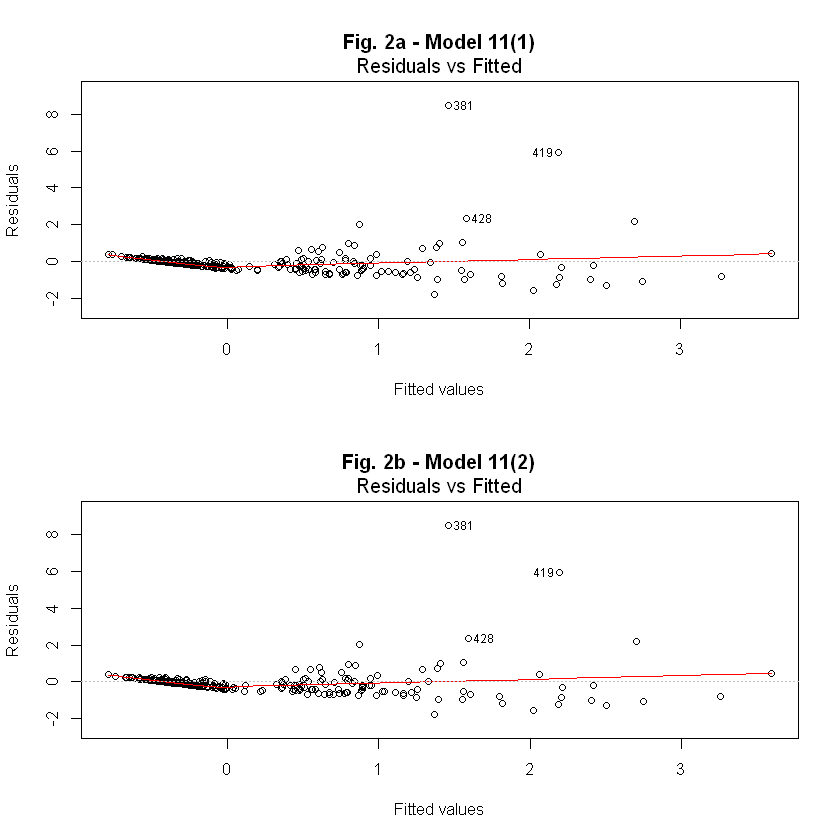

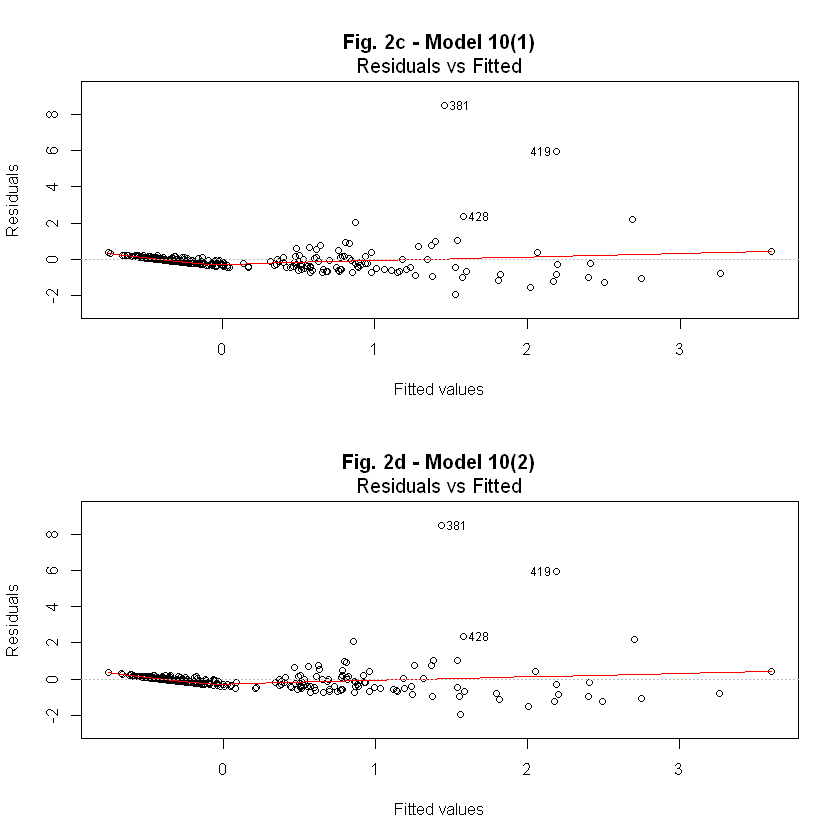

In [472]:
################################################################################################
# Appendex: Best Subset Selection Candidate Models
################################################################################################
model11.1 <- (lm(crim ~ nox + dis + rad + tax + ptratio + black + blackSquare + medv + medvSquare + blackCube + medvCube + medvPoly - 1, data))
model11.2 <- (lm(crim ~ zn + nox + dis + rad + tax + black + blackSquare + medv + medvSquare + blackCube + medvCube + medvPoly - 1, data))
model10.1 <- (lm(crim ~ nox + dis + rad + ptratio + black + medv + blackSquare + medvSquare + blackCube + medvCube + medvPoly - 1, data))
model10.2 <- (lm(crim ~ nox + dis + rad + black + medv + blackSquare + medvSquare + blackCube + medvCube + medvPoly - 1, data))

summary(model11.1)
summary(model11.2)
summary(model10.1)
summary(model10.2)
layout(matrix(c(1,1,2,2), nrow = 2, ncol = 2, byrow = TRUE))
plot(model11.1,1, main="Fig. 2a - Model 11(1)")
plot(model11.2,1, main="Fig. 2b - Model 11(2)")
plot(model10.1,1, main="Fig. 2c - Model 10(1)")
plot(model10.2,1, main="Fig. 2d - Model 10(2)")



[1] 0.3839998

19 x 1 sparse Matrix of class "dgCMatrix"
                       1
(Intercept) -0.175230953
zn           0.017861330
indus       -0.013094955
chas        -0.011714429
nox          0.003421086
rm          -0.004833747
age          0.011005219
dis         -0.046300242
rad          0.198165383
tax          0.093745458
ptratio      0.004842132
black       -0.008241769
lstat        0.033408605
medv        -0.005072271
blackSquare  0.017621043
medvSquare   0.126575939
blackCube   -0.004148447
medvCube    -0.192546984
medvPoly     0.052815520

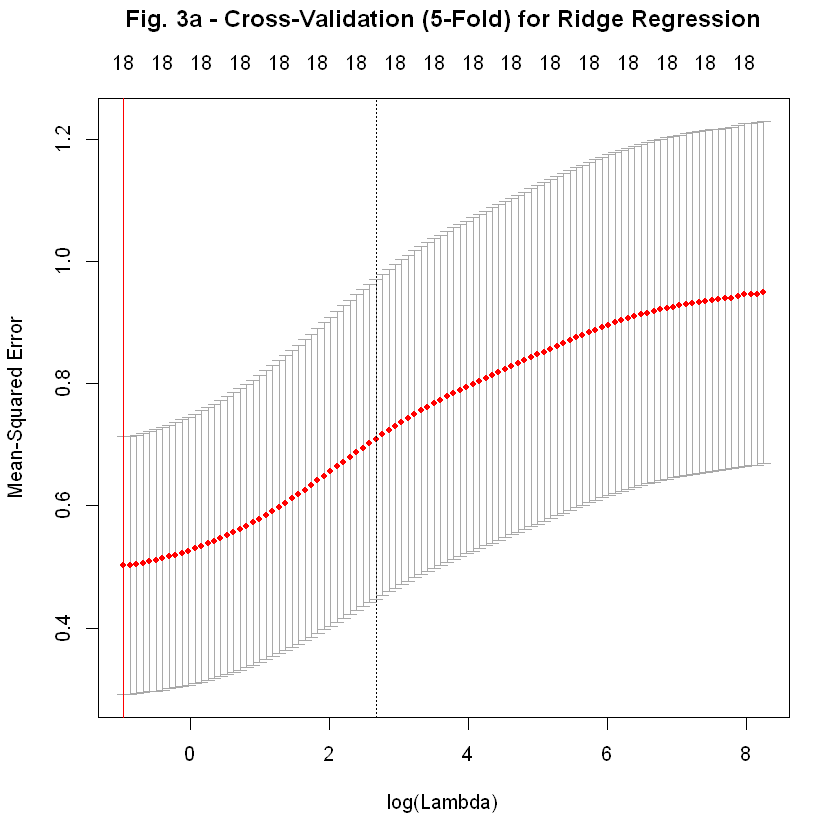

[1] 0.01317299

19 x 1 sparse Matrix of class "dgCMatrix"
                       1
(Intercept) -0.230835006
zn           0.024567953
indus        0.003810779
chas        -0.009213345
nox         -0.105162053
rm          -0.033720033
age          0.018871851
dis         -0.097773691
rad          0.464943447
tax         -0.061866583
ptratio     -0.052099102
black        .          
lstat       -0.015114681
medv         .          
blackSquare  0.045872257
medvSquare   0.237325519
blackCube    0.008407419
medvCube    -0.233209259
medvPoly     0.052139344

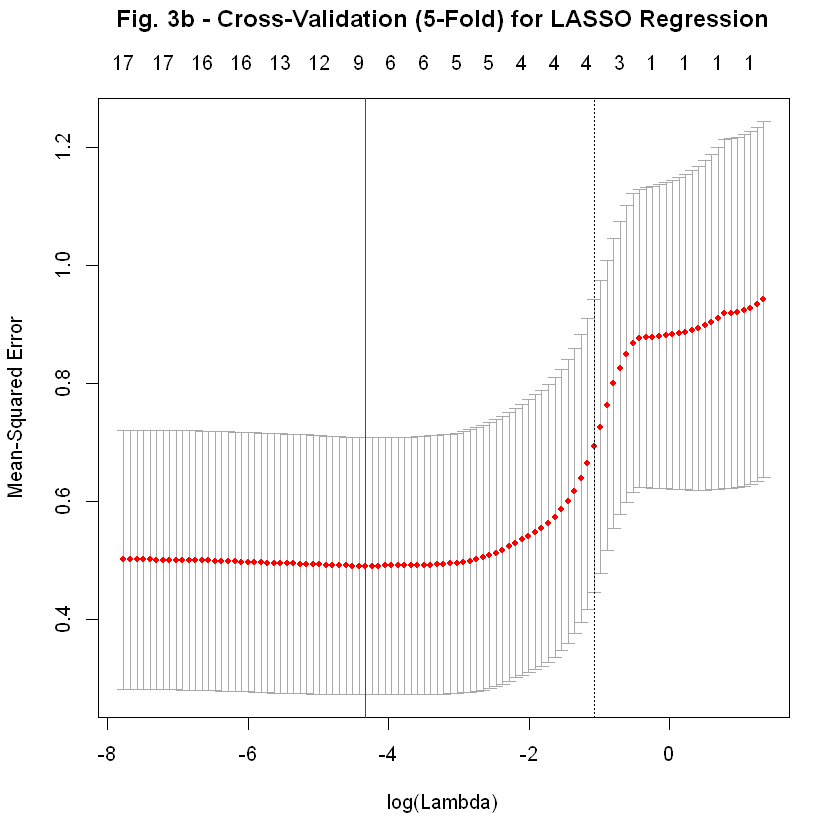

In [485]:
################################################################################################
# Appendex: Perform Ridge Regression and LASSO Regression
################################################################################################

# Set the Seed for reproducibility
set.seed(123)

# Define the X matrix and Y vector
x <- model.matrix(crim ~ ., data)[,-1]
y <- data$crim

# Define the grid shrinkage penalty parameter values
lambdaGrid <- 10^seq(15,-5, length=250)

### Ridge Regression
# Ridge Regression Object
modelRidge <- glmnet(x, y, alpha=0, lambda=lambdaGrid, standardize=FALSE, thresh=1e-19)

# 5-Fold CV to choose best lambda value
cvRidge <- cv.glmnet(x, y, alpha=0, standardize=FALSE, nfolds=5)

# Plot the CV results
plot(cvRidge)
title("Fig. 3a - Cross-Validation (5-Fold) for Ridge Regression", line = 3)
abline(v=log(lambdaValue1), col="red")

# Choose the best lambda value (based on MSE)
(lambdaValue1 <- cvRidge$lambda.min)

# Fit model with the best lambda value
(predict(modelRidge,s=lambdaValue1,type="coefficients"))


### LASSO Regression
# LASSO Regression Object
modelLASSO <- glmnet(x, y, alpha=1, lambda=lambdaGrid, standardize=FALSE, thresh=1e-15)

# 5-Fold CV to choose best lambda value
cvLASSO <- cv.glmnet(x, y, alpha=1, standardize=FALSE, nfolds=5)

# Plot the CV results
plot(cvLASSO)
title("Fig. 3b - Cross-Validation (5-Fold) for LASSO Regression", line = 3)
abline(v=log(lambdaValue2), col="red")


# Choose the best lambda value (based on MSE)
(lambdaValue2 <- cvLASSO$lambda.min)

# Fit model with the best lambda value
(predict(modelLASSO,s=lambdaValue2,type="coefficients"))

[1] "OLS MSE:  0.5233531707421"

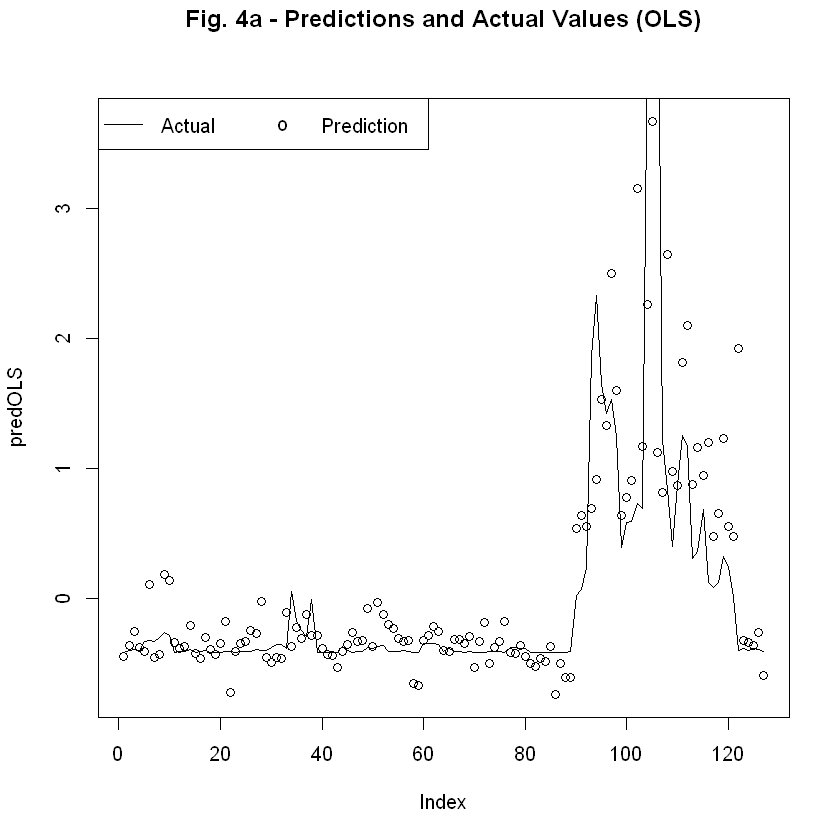

[1] "Ridge MSE:  0.540483126889412"

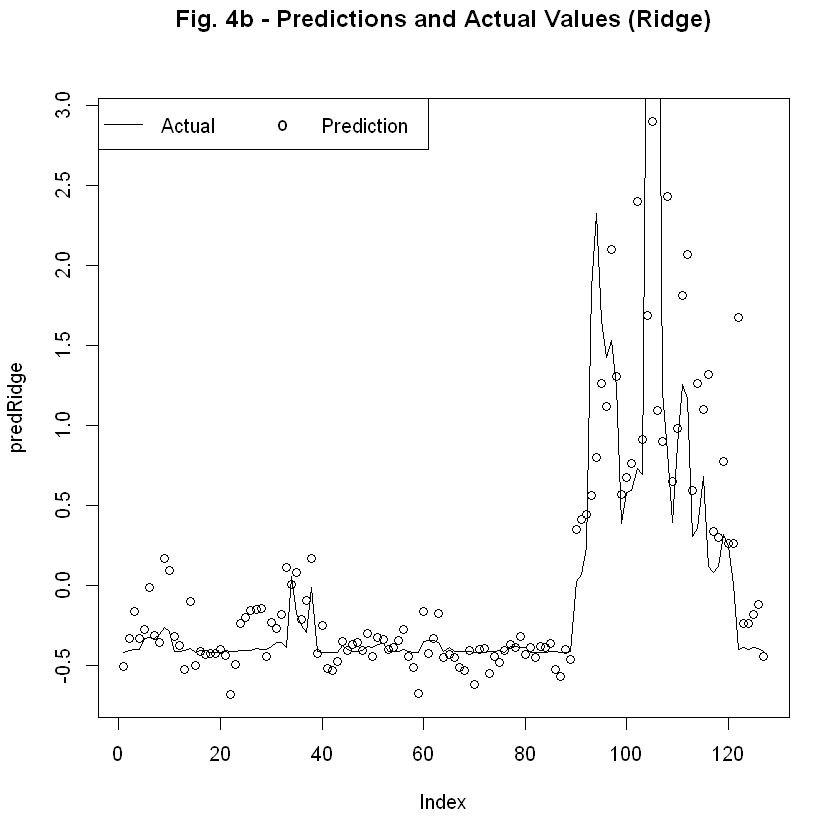

[1] "LASSO MSE:  0.501405565539436"

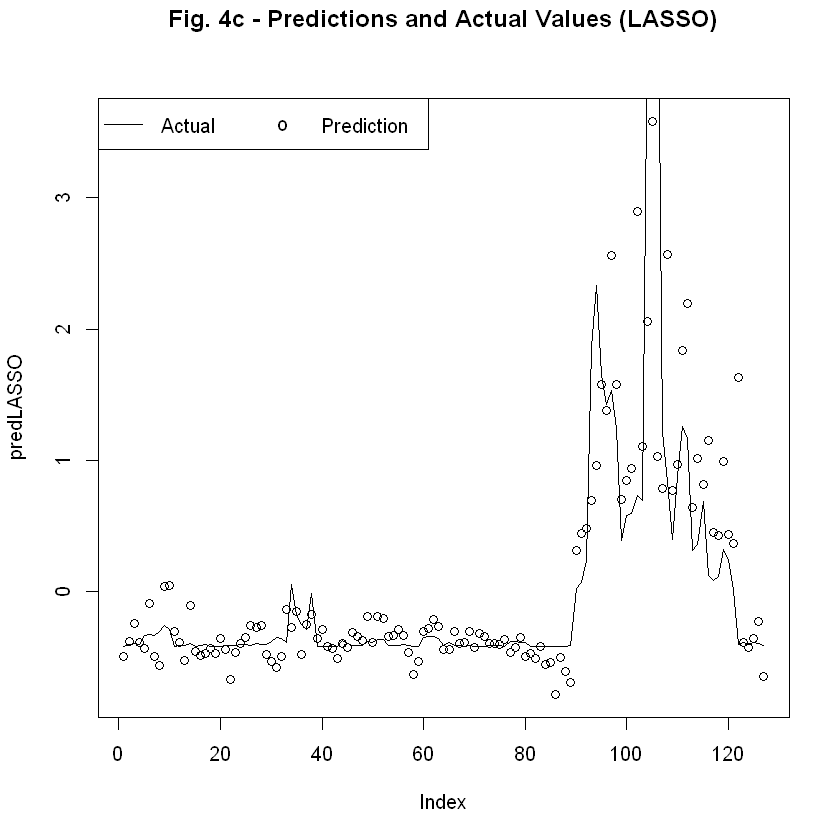

In [513]:
################################################################################################
# Appendex: Compare the Models
################################################################################################
# Define Test X matrix and Test Y vector
testX <- model.matrix(crim ~ ., test)[,-1]
testY <- test$crim

# Get predictions on the test data
predOLS <- predict(model10.1, newdata=test)
predRidge <- predict(modelRidge,s=lambdaValue1,newx=testX)
predLASSO <- predict(modelLASSO,s=lambdaValue2,newx=testX)

plot(predOLS)
lines(test$crim)
title("Fig. 4a - Predictions and Actual Values (OLS)", line = 3)
legend('topleft',c('Actual','Prediction'),lty=c(1,NA),pch=c(NA,'o'),bg='white',ncol=2)
paste("OLS MSE: ", mean((predOLS-test$crim)**2))

plot(predRidge)
lines(test$crim)
title("Fig. 4b - Predictions and Actual Values (Ridge)", line = 3)
legend('topleft',c('Actual','Prediction'),lty=c(1,NA),pch=c(NA,'o'),bg='white',ncol=2)
paste("Ridge MSE: ", mean((predRidge-test$crim)**2))

plot(predLASSO)
lines(test$crim)
title("Fig. 4c - Predictions and Actual Values (LASSO)", line = 3)
legend('topleft',c('Actual','Prediction'),lty=c(1,NA),pch=c(NA,'o'),bg='white',ncol=2)
paste("LASSO MSE: ", mean((predLASSO-test$crim)**2))